In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, ScalarFormatter
from datetime import datetime

In [51]:

# If the file is in the same directory as your Python script, you can just specify the filename
# read csv into a dataframe
df = pd.read_csv('Ky_Bridge_Points.csv')

#Address dtype error for columns 62 or 'D_SERVTYPON' and 64 or 'D_SERVTYPUND'
#these columns are not needed for analysis - ignore dtype error and drop columns
df.drop(columns=['D_SERVTYPON', 'D_SERVTYPUND'], inplace=True)

C:\Users\Nick\AppData\Local\Temp\ipykernel_8924\1140163444.py:3: DtypeWarning: Columns (62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Ky_Bridge_Points.csv')


In [16]:
#Calculate total # of Bridge Projects in Kentucky 2007 - Present
total_bridges = len(df['BRIDGE_ID'])

print("The total number of bridges in Kentucky being analyzed is:", total_bridges,".")

The total number of bridges in Kentucky being analyzed is: 18619 .


In [18]:
#view all districts
ky_districts = df['D_DISTRICT'].unique()
#test = df["DISTRICT"].unique()
#print(test)

print("All Kentucky Districts:", ky_districts)

All Kentucky Districts: ['Paducah' 'Madisonville' 'Bowling Green' 'Covington' 'Flemingsburg'
 'Louisville' 'Lexington' 'Pikeville' 'Jackson' 'Elizabethtown' 'Somerset'
 'Manchester']


In [19]:
#Count Bridges per District (D)
#this is tedious and slow -- should be using for stmt to count all at once

paducah_bridge_count = (df['D_DISTRICT'] == "Paducah").sum()
print("D1 Bridge Count:", paducah_bridge_count)

madisonville_bridge_count = (df['D_DISTRICT'] == "Madisonville").sum()
print("D2 Bridge Count:", madisonville_bridge_count)

bowlinggreen_bridge_count = (df['D_DISTRICT'] == "Bowling Green").sum()
print("D3 Bridge Count:", bowlinggreen_bridge_count)

elizabethtown_bridge_count = (df['D_DISTRICT'] == "Elizabethtown").sum()
print("D4 Bridge Count:", elizabethtown_bridge_count)

louisville_bridge_count = (df['D_DISTRICT'] == "Louisville").sum()
print("D5 Bridge Count:", louisville_bridge_count)

covington_bridge_count = (df['D_DISTRICT'] == "Covington").sum()
print("D6 Bridge Count:", covington_bridge_count)

lexington_bridge_count = (df['D_DISTRICT'] == "Lexington").sum()
print("D7 Bridge Count:", lexington_bridge_count)

somerset_bridge_count = (df['D_DISTRICT'] == "Somerset").sum()
print("D8 Bridge Count:", somerset_bridge_count)

flemingsburg_bridge_count = (df['D_DISTRICT'] == "Flemingsburg").sum()
print("D9 Bridge Count:", flemingsburg_bridge_count)

jackson_bridge_count = (df['D_DISTRICT'] == "Jackson").sum()
print("D10 Bridge Count:", jackson_bridge_count)

manchester_bridge_count = (df['D_DISTRICT'] == "Manchester").sum()
print("D11 Bridge Count:",manchester_bridge_count)

pikeville_bridge_count = (df['D_DISTRICT'] == "Pikeville").sum()
print("D12 Bridge Count:", pikeville_bridge_count)




D1 Bridge Count: 2074
D2 Bridge Count: 2466
D3 Bridge Count: 1109
D4 Bridge Count: 1350
D5 Bridge Count: 2293
D6 Bridge Count: 1428
D7 Bridge Count: 1722
D8 Bridge Count: 1155
D9 Bridge Count: 1317
D10 Bridge Count: 1057
D11 Bridge Count: 1367
D12 Bridge Count: 1281


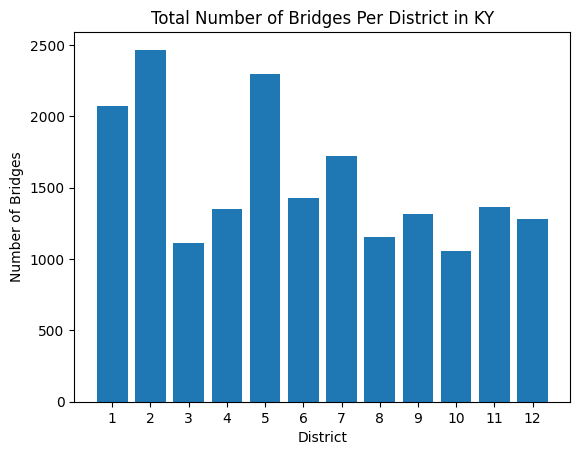

In [20]:
#Count Bridges per District (D)
district_bridge_counts = df['DISTRICT'].value_counts()

# Print bridge counts for each district
# for district, count in district_bridge_counts.items():
#    print(f"D{district} Bridge Count: {count}")

#plot data
plt.bar(district_bridge_counts.index, district_bridge_counts.values)
plt.xlabel('District')
plt.ylabel('Number of Bridges')
plt.title('Total Number of Bridges Per District in KY')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.show()

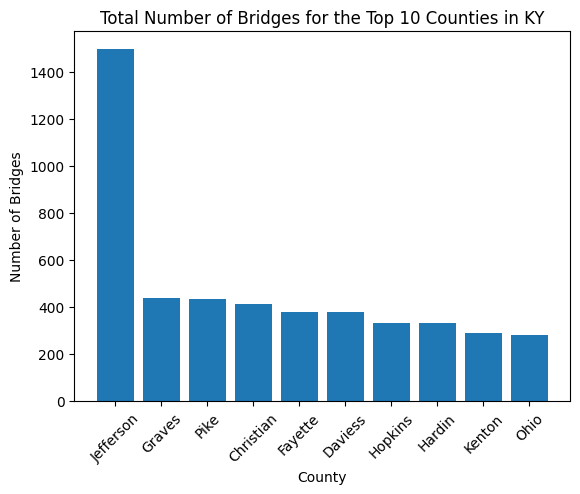

In [21]:
# Count Bridges per County and Sort Highest Counts
county_bridge_counts = df['CNTY_NAME'].value_counts()

# Print bridge counts for each county
#for county, count in county_bridge_counts.items():
#    print(f"{county} Bridge Count: {count}")

# Sort the counties by the number of bridges in descending order
county_order = county_bridge_counts.sort_values(ascending=False)

# Select the top ten counties
top_ten_counties = county_order.head(10)

# Plot Data 
plt.bar(top_ten_counties.index, top_ten_counties.values)
plt.xlabel('County')
plt.ylabel('Number of Bridges')
plt.title('Total Number of Bridges for the Top 10 Counties in KY')
plt.xticks(rotation=45)
plt.show()

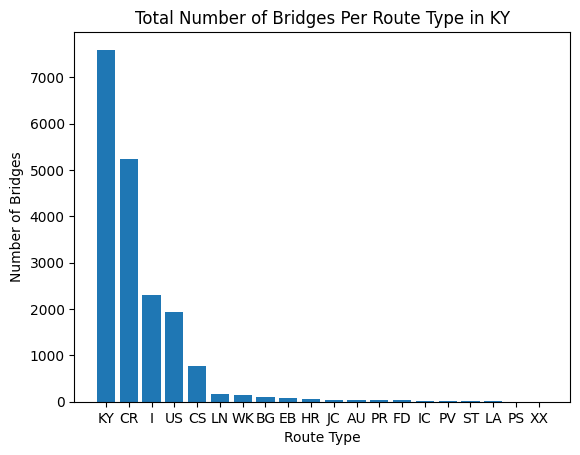

In [22]:
# Count Bridges per Route Type
route_bridge_counts = df['RT_PREFIX'].value_counts()

#print bridge counts for each route type
#for route, count in route_bridge_counts.items():
#    print(f"{route} Bridge Count: {count}")

plt.bar(route_bridge_counts.index, route_bridge_counts.values)
plt.xlabel('Route Type')
plt.ylabel('Number of Bridges')
plt.title('Total Number of Bridges Per Route Type in KY')
plt.show()

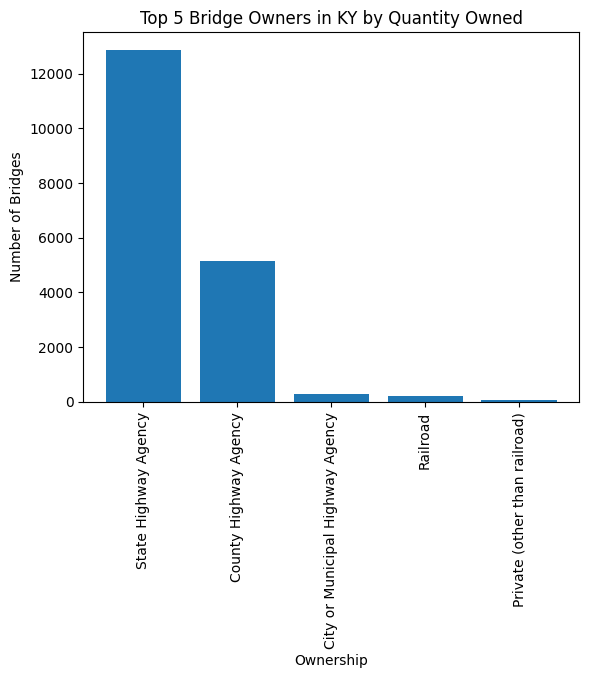

In [23]:
# Count Number of Bridges by Ownership
owner_bridge_counts = df['D_OWNER'].value_counts()

#print bridge counts for each owner
#for owner, count in owner_bridge_counts.items():
#    print(f"{owner} Bridge Count: {count}")

# Sort the owners by the number of bridges in descending order
owner_order = owner_bridge_counts.sort_values(ascending=False)

# Select the top five owners by quanity of bridges owned
top_five_owners = owner_order.head()

# Plot Data 
plt.bar(top_five_owners.index, top_five_owners.values)
plt.xlabel('Ownership')
plt.ylabel('Number of Bridges')
plt.title('Top 5 Bridge Owners in KY by Quantity Owned')
plt.xticks(rotation=90)
plt.show()

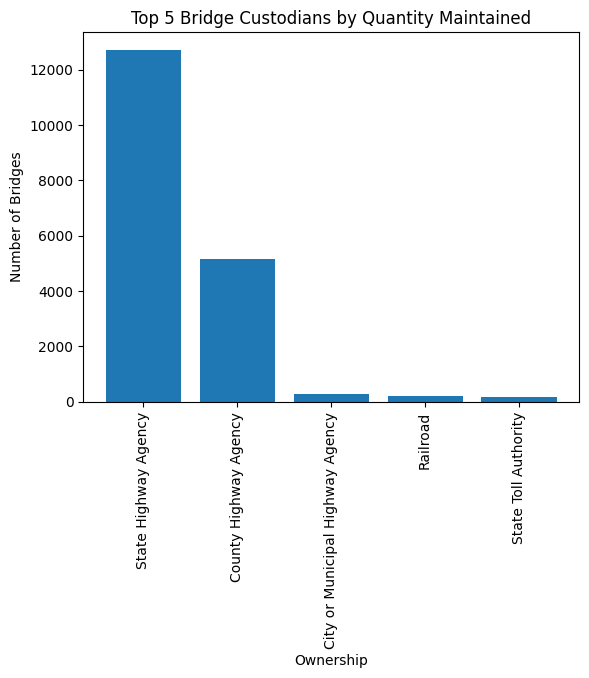

In [24]:
# Count Number of Bridges by Custodian
custodian_bridge_counts = df['D_CUSTODIAN'].value_counts()

#print bridge counts for each custodian
#for custodian, count in custodian_bridge_counts.items():
#    print(f"{custodian} Bridge Count: {count}")

# Sort the custodians by the number of bridges in descending order
custodian_order = custodian_bridge_counts.sort_values(ascending=False)

# Select the top five custodians by quantity of maintained bridges
top_five_custodians = custodian_order.head()

# Plot Data 
plt.bar(top_five_custodians.index, top_five_custodians.values)
plt.xlabel('Ownership')
plt.ylabel('Number of Bridges')
plt.title('Top 5 Bridge Custodians by Quantity Maintained')
plt.xticks(rotation=90)
plt.show()



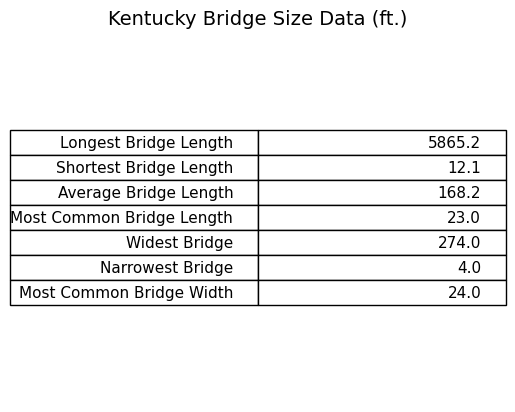

In [25]:
##Calculate Max, Min, Mean and Mode Lengths of Bridges in KY
longest_bridge = df["LENGTH"].max()
shortest_bridge = df["LENGTH"].min()
avg_bridge_length = round(df["LENGTH"].mean(), 1)
mode_bridge_length = df["LENGTH"].mode().iloc[0]

#identify "name(s)" of the longest bridge(s)
#

#identify "name(s)" of the shortest bridge(s)
#

##Calculate Max, Min and Mean Widths of Bridges in KY
widest_bridge = df[df["ROADWIDTH"] !=0]["ROADWIDTH"].max()
narrowest_bridge = df[df["ROADWIDTH"] !=0]["ROADWIDTH"].min()
avg_bridge_width = round(df[df["ROADWIDTH"] !=0]["ROADWIDTH"].mean(), 1)
mode_bridge_width = df[df["ROADWIDTH"] != 0]["ROADWIDTH"].mode().iloc[0]

#identify "name(s)" of the widest bridge(s)
#

#identify "name(s)" of the narrowest bridge(s)
#

#print("The longest bridge is", longest_bridge, "ft and the shortest bridge is", shortest_bridge, "ft.")
#print("The average bridge length is", avg_bridge_length,"ft.")
#print("The most common bridge length is", mode_bridge_length, "ft.")
#print("")
#print("The widest bridge is", widest_bridge, "ft and the narrowest bridge is", narrowest_bridge,"ft.")
#print("The average bridge width is", avg_bridge_width, "ft.")
#print("The most common bridge width is", mode_bridge_width, "ft.")

#Create a Table
size_data = [
    ["Longest Bridge Length", longest_bridge],
    ["Shortest Bridge Length", shortest_bridge],
    ["Average Bridge Length", avg_bridge_length],
    ["Most Common Bridge Length", mode_bridge_length],
    ["Widest Bridge", widest_bridge],
    ["Narrowest Bridge", narrowest_bridge],
    ["Most Common Bridge Width", mode_bridge_width]
]

# Create a figure and axis
fig, ax = plt.subplots()

# Hide the axes
ax.axis('off')

# Create the table
bridge_size_table = ax.table(cellText=size_data, loc='center')

# Adjust font size
bridge_size_table.auto_set_font_size(False)
bridge_size_table.set_fontsize(11)

# Adjust cell heights
bridge_size_table.scale(1, 1.5)

# Add a title to the table
size_title = ax.set_title("Kentucky Bridge Size Data (ft.)", fontsize=14)

plt.show()

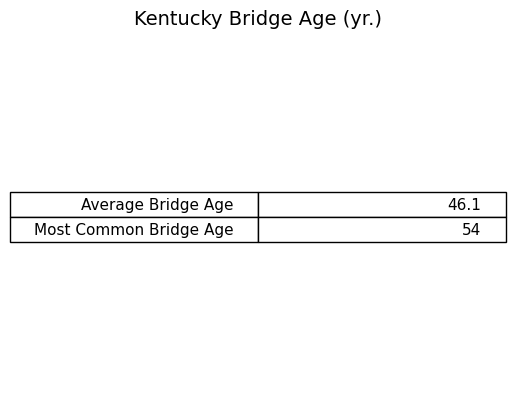

In [26]:
## Determine Average Age of Bridges

# identify current year
current_year = datetime.now().year

# Calculate the age of each bridge
# Now df contains a new column "BRIDGE_AGE" with the age of each bridge
df["BRIDGE_AGE"] = current_year - df["YEARBUILT"]

#calculate average age of a bridge in KY
avg_bridge_age = round(df["BRIDGE_AGE"].mean(), 1)

#calculate most common age of a bridge
mode_bridge_age = df["BRIDGE_AGE"].mode().iloc[0]

# Filter out bridges with age 0
valid_bridges = df[df["BRIDGE_AGE"] >= 1]

# Calculate the oldest bridge age
oldest_bridge = df["BRIDGE_AGE"].max()

#tried multiple ways to calculate oldest and youngest bridges, but did not have success
#tried manipulating YEARBUILT and tried manipulating BRIDGE_AGE so that the min and max would not show as 0 and 2024

age_data = [
    ["Average Bridge Age", avg_bridge_age],
    ["Most Common Bridge Age", mode_bridge_age]
]

# Create a figure and axis
fig, ax = plt.subplots()

# Hide the axes
ax.axis('off')

# Create the table
bridge_age_table = ax.table(cellText=age_data, loc='center')

# Adjust font size
bridge_age_table.auto_set_font_size(False)
bridge_age_table.set_fontsize(11)

# Adjust cell heights
bridge_age_table.scale(1, 1.5)

# Add a title to the table
size_title = ax.set_title("Kentucky Bridge Age (yr.)", fontsize=14)

plt.show()

#print("The average bridge age is", avg_bridge_age,"years.")
#print("The most common bridge age is", mode_bridge_age,"years.")

In [27]:
#Read in file containing Weight Limits for Bridges in Kentucky
# If the file is in the same directory as your Python script, you can just specify the filename
df_w = pd.read_csv('Kentuckys Weight-Posted Bridges.csv')

#join Ky_Bridge_Points.csv with Kentuckys Weight-Posted Bridges.xlsx by Bridge ID using pandas
merged_df = pd.merge(df, df_w, left_on='BRIDGE_ID', right_on='Bridge ID#', how='inner')


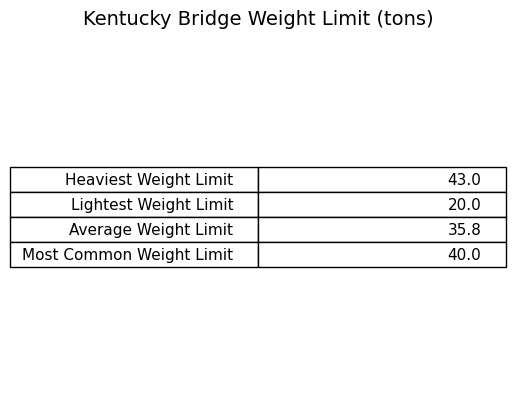

In [28]:
##Calculate max, min, mean and mode weight load limits for Bridges with SU5 Load Limit Postings
max_bridge_limit = merged_df["SU5 (tons)"].max()
min_bridge_limit = merged_df["SU5 (tons)"].min()
avg_bridge_limit = round(merged_df["SU5 (tons)"].mean(), 1)
mode_bridge_limit = merged_df["SU5 (tons)"].mode().iloc[0]

#Create a Table
limit_data = [
    ["Heaviest Weight Limit", max_bridge_limit],
    ["Lightest Weight Limit", min_bridge_limit],
    ["Average Weight Limit", avg_bridge_limit],
    ["Most Common Weight Limit", mode_bridge_limit]
]

# Create a figure and axis
fig, ax = plt.subplots()

# Hide the axes
ax.axis('off')

# Create the table
bridge_limit_table = ax.table(cellText=limit_data, loc='center')

# Adjust font size
bridge_limit_table.auto_set_font_size(False)
bridge_limit_table.set_fontsize(11)

# Adjust cell heights
bridge_limit_table.scale(1, 1.5)

# Add a title to the table
size_title = ax.set_title("Kentucky Bridge Weight Limit (tons)", fontsize=14)

plt.show()

#print("The heaviest weight limit for bridges is", max_bridge_limit, "tons.")
#print("The lightest weight limit for bridges is", min_bridge_limit, "tons.")
#print("The average weight limit for bridges is", avg_bridge_limit, "tons.")
#print("The most common weight limit for bridges is", mode_bridge_limit, "tons.")

In [29]:
# Read in file containing KYTC Project Archives and isolate projects involving Bridges

# If the file is in the same directory as your Python script, you can just specify the filename
df_p = pd.read_csv('KYTC Project Archives.csv')

# Filter rows containing 'bridge' in the 'WORK TYPE DESCRIPTION' column
# and with 'AWARD' status in the 'STATUS' column
kytc_bridge_projects_awarded = df_p[
    (df_p['WORK TYPE DESCRIPTION'].str.contains('bridge', case=False, na=False)) &
    (df_p['STATUS'] == 'AWARD')
]
                        
#calculate number of KYTC Bridge Projects in file (2007 - 2023)
total_bridge_projects_awarded = len(kytc_bridge_projects_awarded)
#print("From 2007 - 2023, KYTC has completed", total_bridge_projects_awarded,"Bridge Projects.")

# Drop NaN values and convert to numeric
cleaned_low_bid_amt = pd.to_numeric(kytc_bridge_projects_awarded['LOW BID AMT'].dropna(), errors='coerce')

In [30]:
# Calculate max, min, mean, mode KYTC Bridge Project Cost and total spent(2007 - 2023)
if not cleaned_low_bid_amt.empty:
    highest_bridge_cost = round(cleaned_low_bid_amt.max(), 0)
    lowest_bridge_cost = round(cleaned_low_bid_amt.min(), 0)
    avg_bridge_cost = round(cleaned_low_bid_amt.mean(), 1)
    total_bridge_cost = round(cleaned_low_bid_amt.sum(), 0)
else:
    # Handle case where no valid numeric values are present
    highest_bridge_cost = np.nan
    lowest_bridge_cost = np.nan
    avg_bridge_cost = np.nan
    total_bridge_cost = np.nan


#print("The KYTC Bridge Project that cost the most from 2007 - 2023 was $",highest_bridge_cost)
#print("The KYTC Bridge Project that cost the least from 2007 - 2023 was $", lowest_bridge_cost)
#print("The average cost for a KYTC Bridge Project from 2007 - 2023 was $", avg_bridge_cost)
#print("The total amount KYTC spent on Bridge Projects from 2023 - Present was $", total_bridge_cost)

In [32]:
#calculate the average cost per Bridge Project
cost_per_bridge = total_bridge_cost // total_bridge_projects_awarded
#print("The average cost per Bridge Project was: $", cost_per_bridge,".")

#Calculate estimated total cost to maintain all bridges
cost_all_bridges = cost_per_bridge * total_bridges
#print("The estimated cost to maintain all bridges is $", cost_all_bridges,".")

#calculate estimated total per district
D1_cost = cost_per_bridge * paducah_bridge_count
D2_cost = cost_per_bridge * madisonville_bridge_count
D3_cost = cost_per_bridge * bowlinggreen_bridge_count
D4_cost = cost_per_bridge * elizabethtown_bridge_count
D5_cost = cost_per_bridge * louisville_bridge_count
D6_cost = cost_per_bridge * covington_bridge_count
D7_cost = cost_per_bridge * lexington_bridge_count
D8_cost = cost_per_bridge * somerset_bridge_count
D9_cost = cost_per_bridge * flemingsburg_bridge_count
D10_cost = cost_per_bridge * jackson_bridge_count
D11_cost = cost_per_bridge * manchester_bridge_count
D12_cost = cost_per_bridge * pikeville_bridge_count

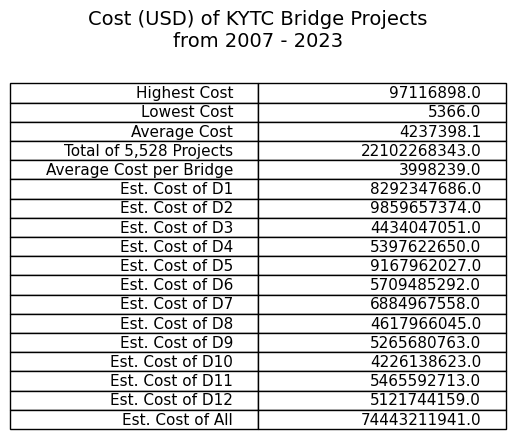

In [33]:
#create a table
cost_data = [
    ["Highest Cost", highest_bridge_cost],
    ["Lowest Cost", lowest_bridge_cost],
    ["Average Cost", avg_bridge_cost],
    ["Total of 5,528 Projects", total_bridge_cost],
    ["Average Cost per Bridge", cost_per_bridge],
    ["Est. Cost of D1", D1_cost],
    ["Est. Cost of D2", D2_cost],
    ["Est. Cost of D3", D3_cost],
    ["Est. Cost of D4", D4_cost],
    ["Est. Cost of D5", D5_cost],
    ["Est. Cost of D6", D6_cost],
    ["Est. Cost of D7", D7_cost],
    ["Est. Cost of D8", D8_cost],
    ["Est. Cost of D9", D9_cost],
    ["Est. Cost of D10", D10_cost],
    ["Est. Cost of D11", D11_cost],
    ["Est. Cost of D12", D12_cost],
    ["Est. Cost of All", cost_all_bridges]
]

# Create a figure and axis
fig, ax = plt.subplots()

# Hide the axes
ax.axis('off')

# Create the table
bridge_cost_table = ax.table(cellText=cost_data, loc='center', bbox=[0, -0.3, 1, 1.2])

# Adjust font size
bridge_cost_table.auto_set_font_size(False)
bridge_cost_table.set_fontsize(11)

# Adjust cell heights
bridge_cost_table.scale(1, 1.5)

# Add a title to the table
size_title = ax.set_title("Cost (USD) of KYTC Bridge Projects\nfrom 2007 - 2023", fontsize=14)

# Adjust the layout to move the table down
plt.subplots_adjust(top=0.8, bottom=0.2)

plt.show()

C:\Users\Nick\AppData\Local\Temp\ipykernel_8924\1090844137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kytc_bridge_projects_awarded['LET DATE'] = pd.to_datetime(kytc_bridge_projects_awarded['LET DATE'])


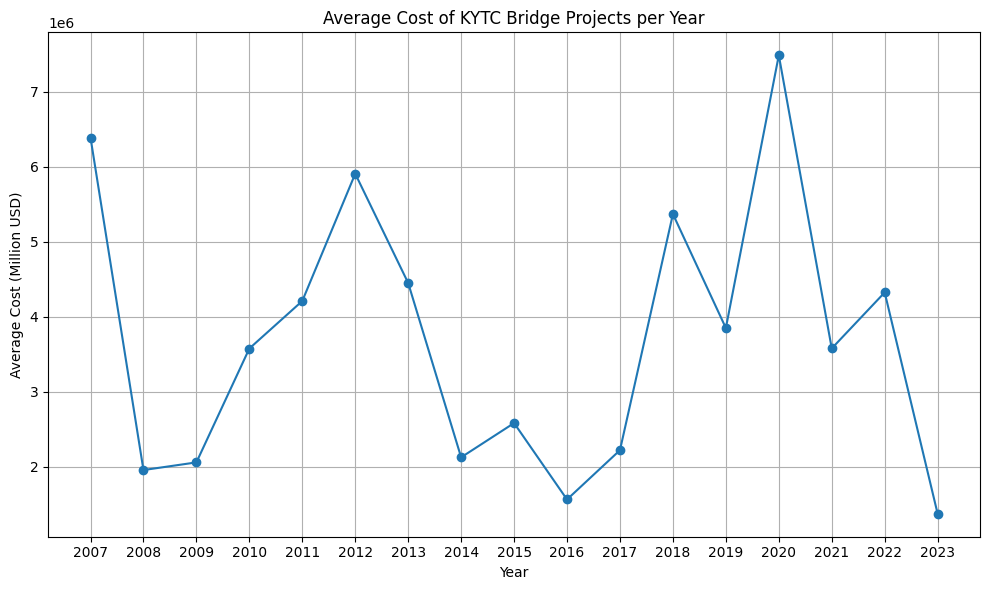

In [43]:
# Convert 'LET DATE' column to datetime format
kytc_bridge_projects_awarded['LET DATE'] = pd.to_datetime(kytc_bridge_projects_awarded['LET DATE'])

# Now extract the year component and create a new column 'YEAR'
kytc_bridge_projects_awarded.loc[:, 'YEAR'] = kytc_bridge_projects_awarded['LET DATE'].dt.year

# Concatenate cleaned_low_bid_amt with the 'YEAR' column
combined_data = pd.concat([cleaned_low_bid_amt, kytc_bridge_projects_awarded['YEAR']], axis=1)

# Group by 'YEAR' and calculate the average
avg_cost_per_year = combined_data.groupby('YEAR').mean()

# Set custom formatting function for floats
pd.options.display.float_format = '{:,.0f}'.format

# Display the result
#print(avg_cost_per_year)

# Plot the average cost per year
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(avg_cost_per_year.index, avg_cost_per_year.values, marker='o', linestyle='-')
plt.title('Average Cost of KYTC Bridge Projects per Year')
plt.xlabel('Year')
plt.ylabel('Average Cost (Million USD)')
plt.grid(True)
plt.xticks(avg_cost_per_year.index)  # Set x-axis ticks to be the years
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()